In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.generated.generated_data import get_noisy_nonlinear_with_non_noisy_labels
import common_grid_search_analysis
import KNN.common_knn as common_knn
import TrainingCurves

import numpy as np
from sklearn import neighbors

In [2]:
GS_FILE_NAME_PREFIX = "Analysis_Data/NOISY_NONLINEAR_KNN"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "K Nearest Neighbors"
DATASET = "Noisy Non-Linear"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.05)

In [3]:
# Load Data
X_train, X_test, y_train, y_test, y_test_non_noisy = get_noisy_nonlinear_with_non_noisy_labels()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "accuracy")

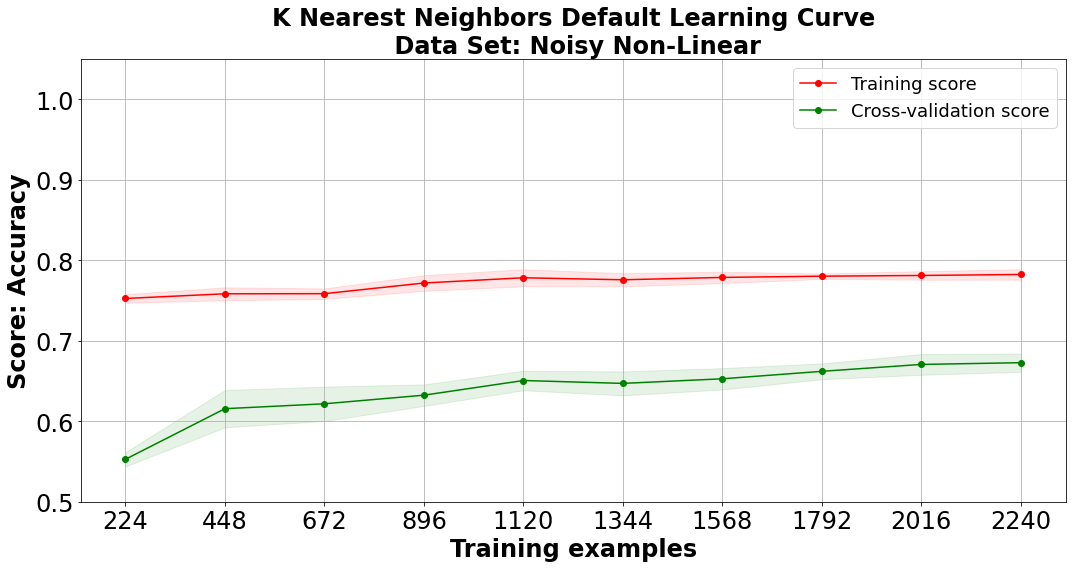

In [5]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, default_title, ylim=ylim)

In [6]:
n_neighbors = [i for i in range(1, 80)]
weights = ['uniform', 'distance']
p = [1, 2]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size = [i for i in range(100)]

In [7]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 790 out of 790 | elapsed:   29.5s finished


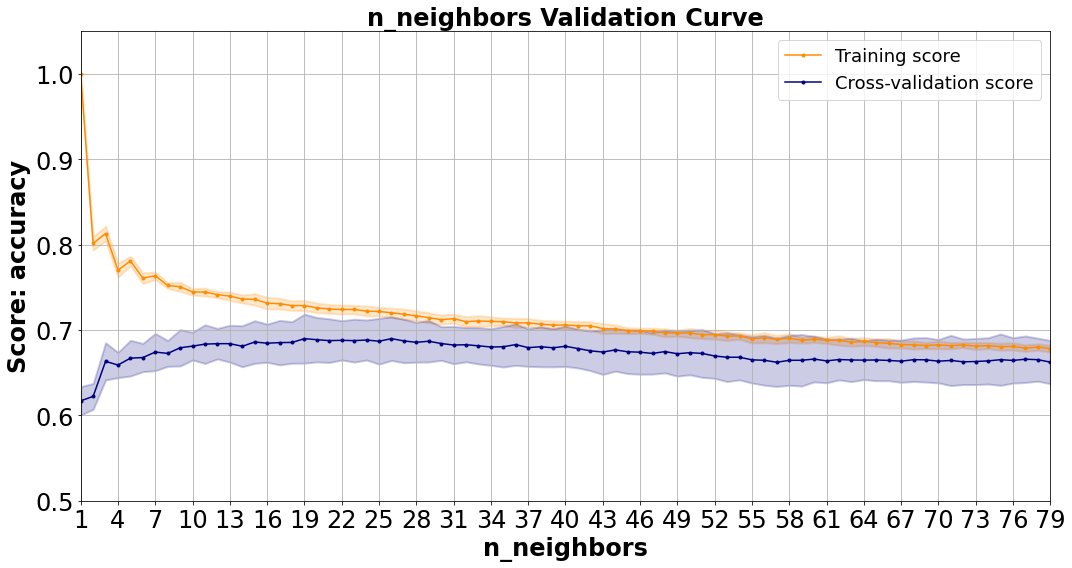

In [8]:
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=3, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.6s finished


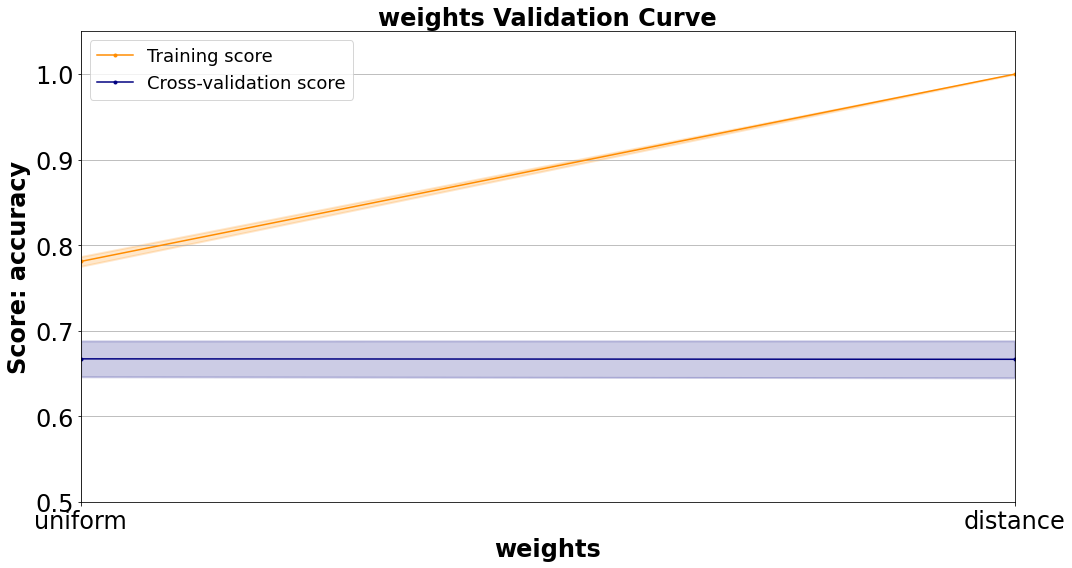

In [9]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "weights", weights, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "weights", weights, title="weights Validation Curve", scoring="accuracy", tick_spacing=1, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.9s finished


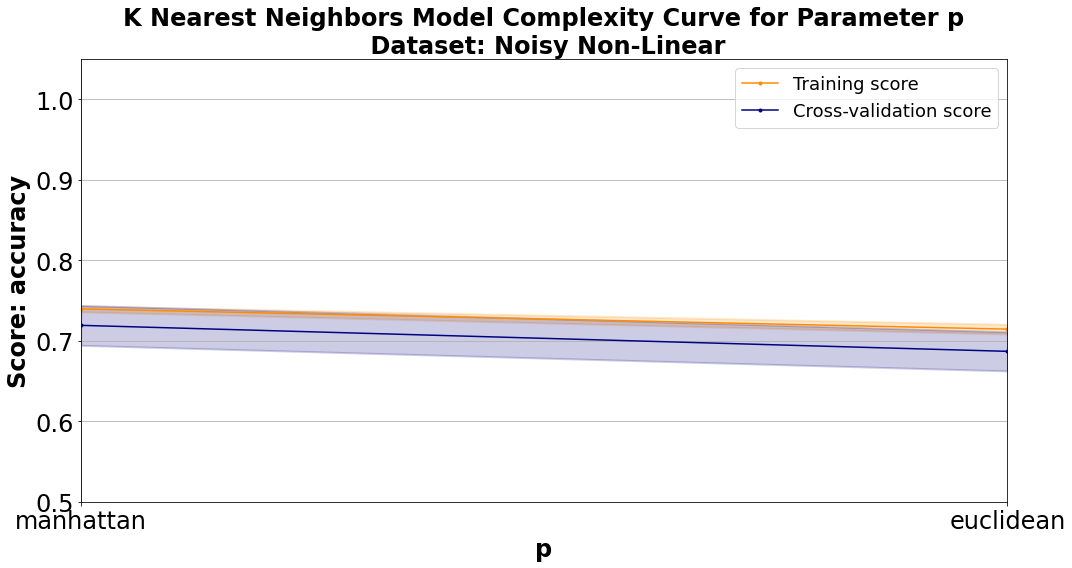

In [10]:
title = "{} Model Complexity Curve for Parameter p\n Dataset: {}".format(ALGO, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(n_neighbors=29), X_train, y_train, "p", p, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "p", ['manhattan', 'euclidean'], title=title, scoring="accuracy", tick_spacing=1, ylim=ylim)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 790 out of 790 | elapsed:   35.0s finished


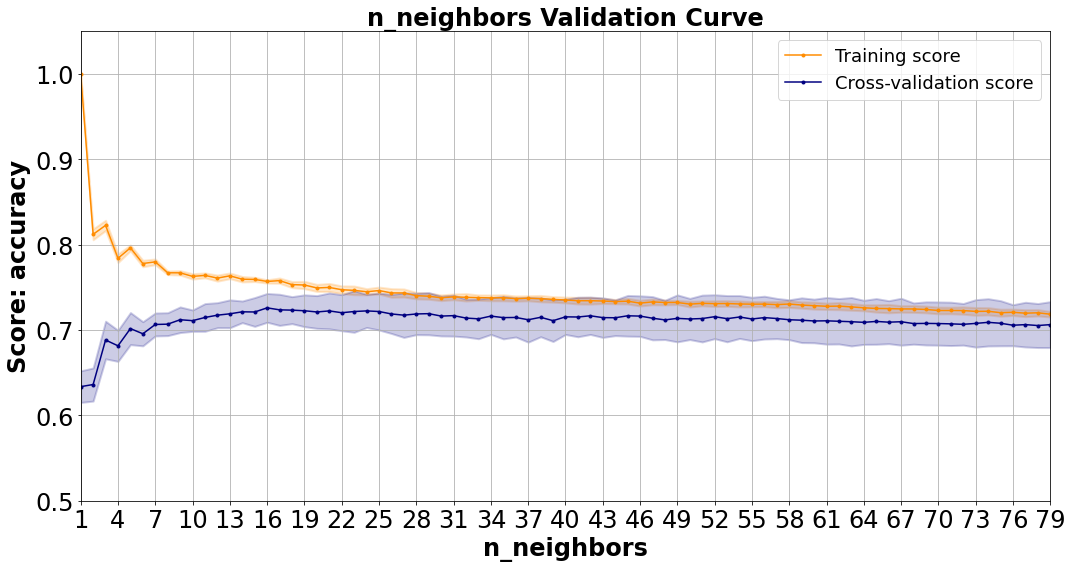

In [11]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(p=1), X_train, y_train, "n_neighbors", n_neighbors, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_neighbors", n_neighbors, title="n_neighbors Validation Curve", scoring="accuracy", tick_spacing=3, ylim=ylim)


In [12]:
parameters = {'n_neighbors': n_neighbors, 'weights': weights, 'p': p}

gs = common_knn.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results = gs

NOT performing Grid Search


/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/home/richard/.virtualenvs/computervision/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.0 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_ModelComplexity_n_neighbors_p_weights.png


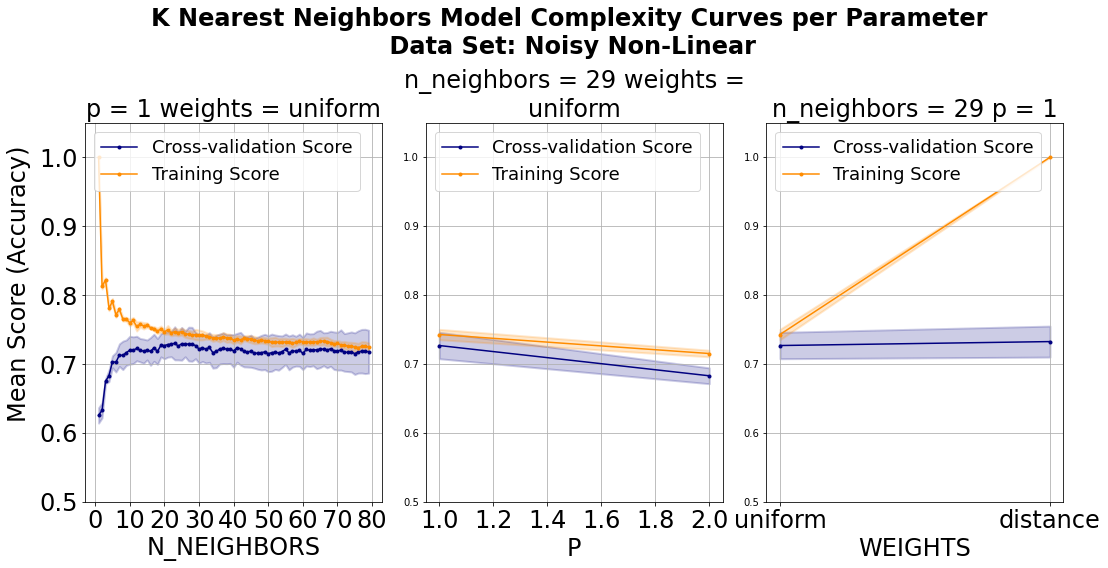

Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_Times_n_neighbors_p_weights.png


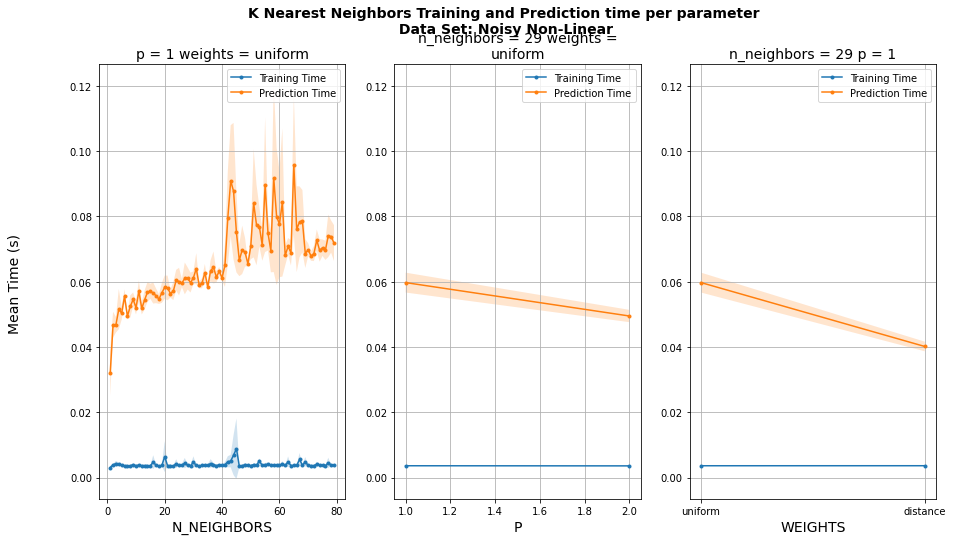

In [13]:
unused_params_value_dict = {'p': 1, 'weights': 'uniform', 'n_neighbors': 29}
common_grid_search_analysis.plot_grid_search_model_complexity(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict, ylim=ylim)
common_grid_search_analysis.plot_grid_search_training_times(gs_results, PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict)

Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_ModelComplexity_n_neighbors_p_weights.png


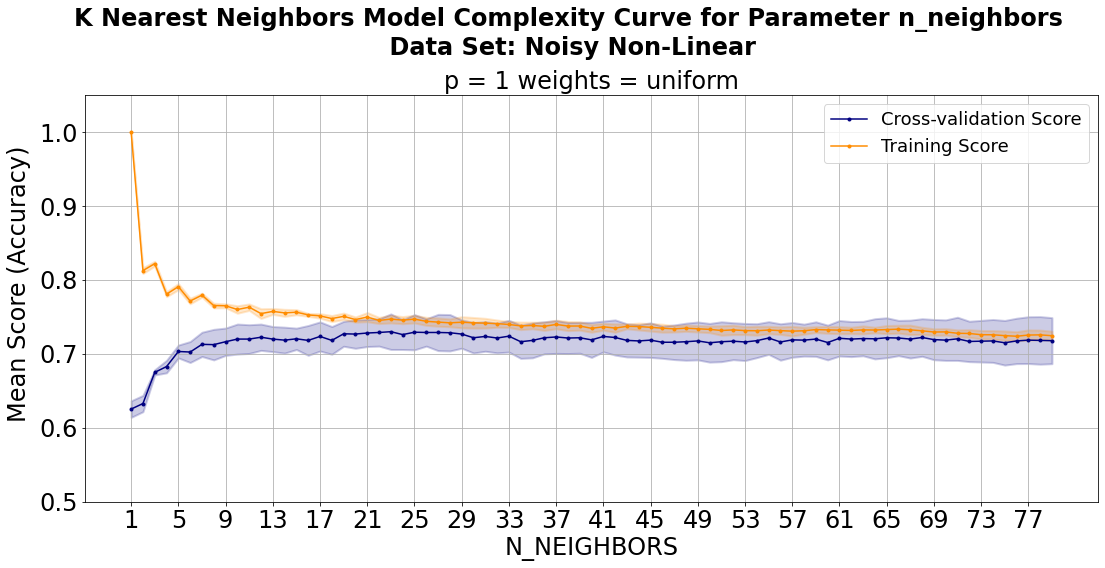

Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_Times_n_neighbors_p_weights.png


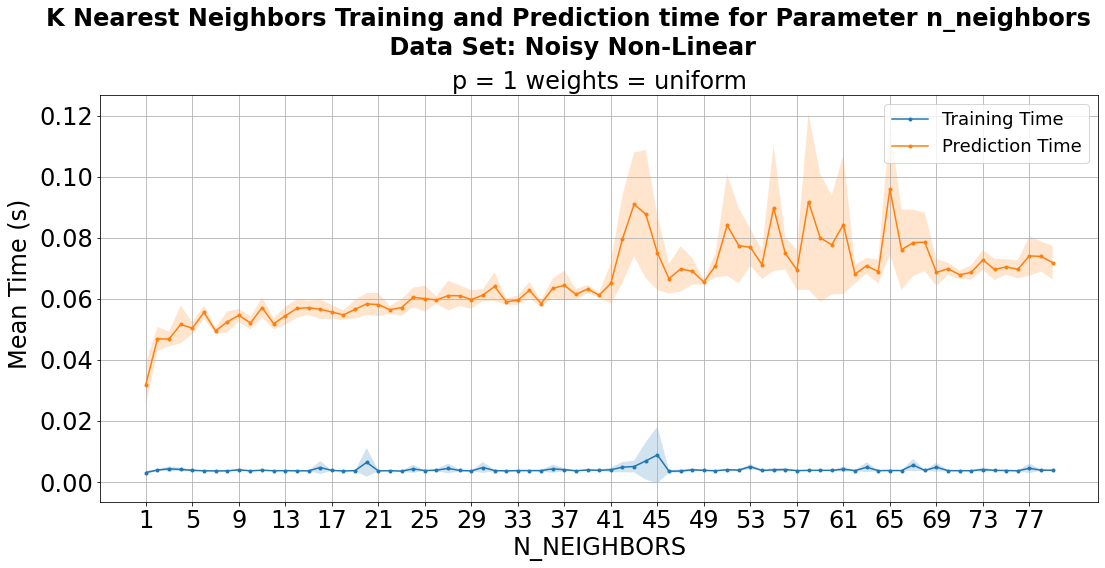

In [14]:
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'n_neighbors', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict, ylim=ylim, tick_spacing=4, legend_loc="upper right")
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'n_neighbors', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict, tick_spacing=4)

Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_ModelComplexity_n_neighbors_p_weights.png


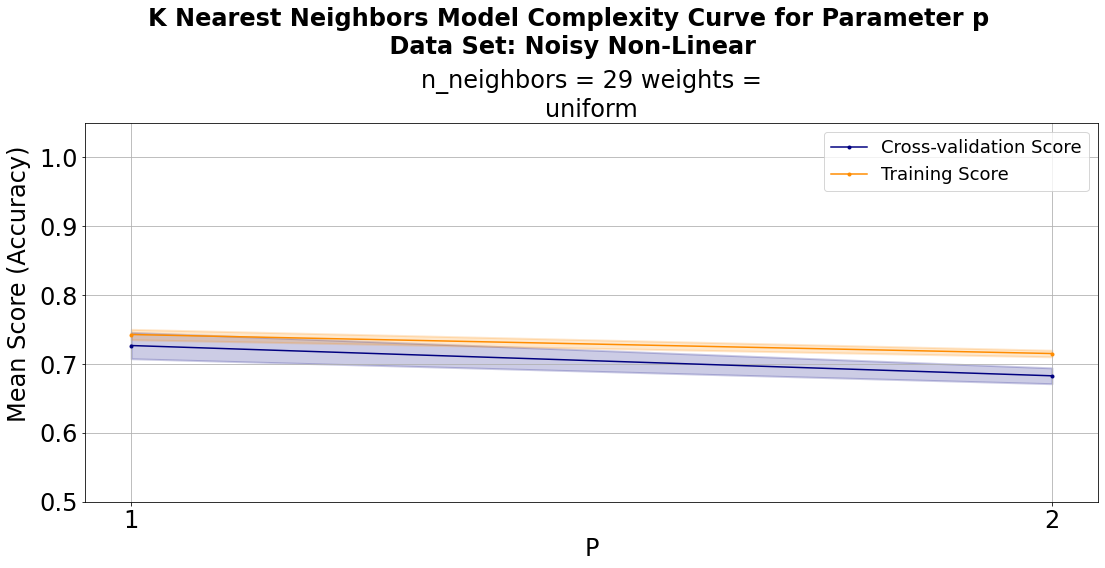

Plot saved as:  Figures/Noisy_Non-Linear_K Nearest Neighbors_GS_Times_n_neighbors_p_weights.png


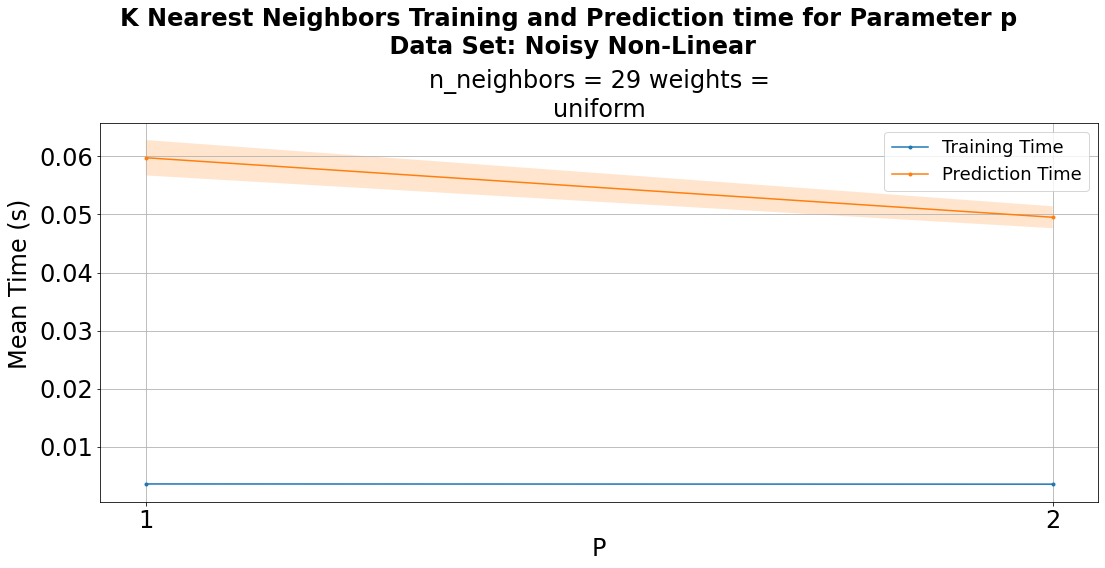

In [15]:
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results, 'p', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict, ylim=ylim, tick_spacing=1, legend_loc="upper right")
common_grid_search_analysis.plot_grid_search_training_times_1param(gs_results, 'p', PLOT_SAVE_LOCATION, ALGO=ALGO, DATASET=DATASET, unused_params_value_dict=unused_params_value_dict, tick_spacing=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.4s finished


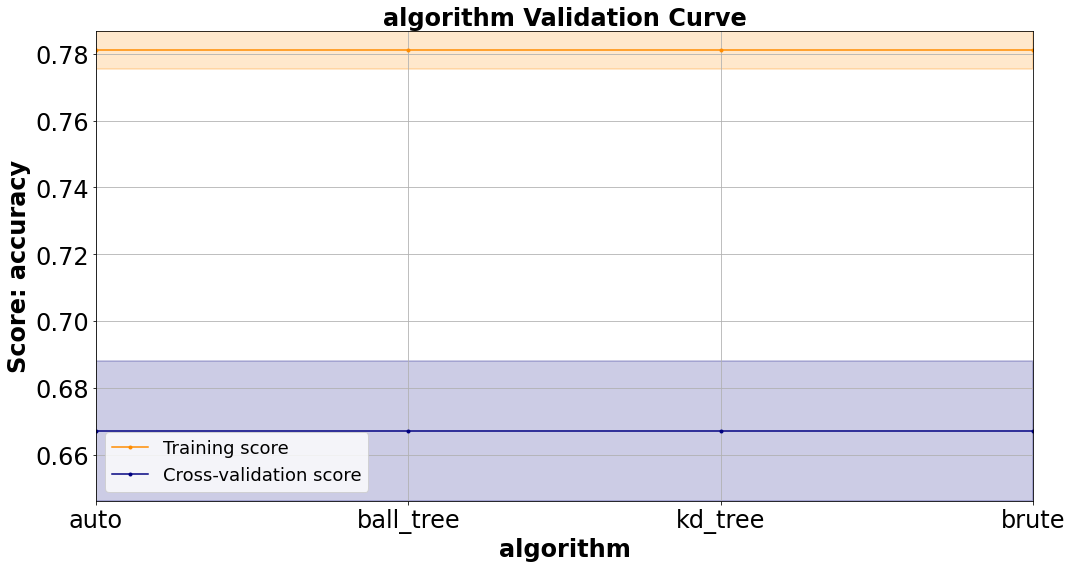

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   36.7s finished


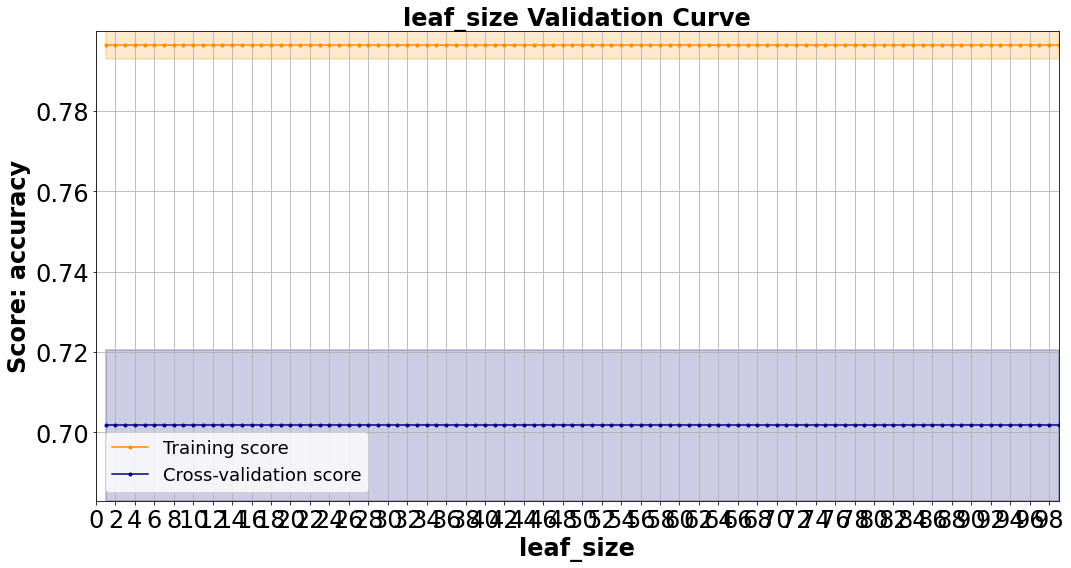

In [16]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(), X_train, y_train, "algorithm", algorithm, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "algorithm", algorithm, title="algorithm Validation Curve", scoring="accuracy", tick_spacing=1)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(neighbors.KNeighborsClassifier(algorithm='ball_tree', metric='manhattan'), X_train, y_train, "leaf_size", leaf_size, 'accuracy', cv=TrainingCurves.get_cv())
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "leaf_size", leaf_size, title="leaf_size Validation Curve", scoring="accuracy", tick_spacing=2)

In [17]:
params = {"n_neighbors": 29, "p":1}
# Start with Learning Curve on Default Classifier
train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(neighbors.KNeighborsClassifier(**params), X_train, y_train, "accuracy")

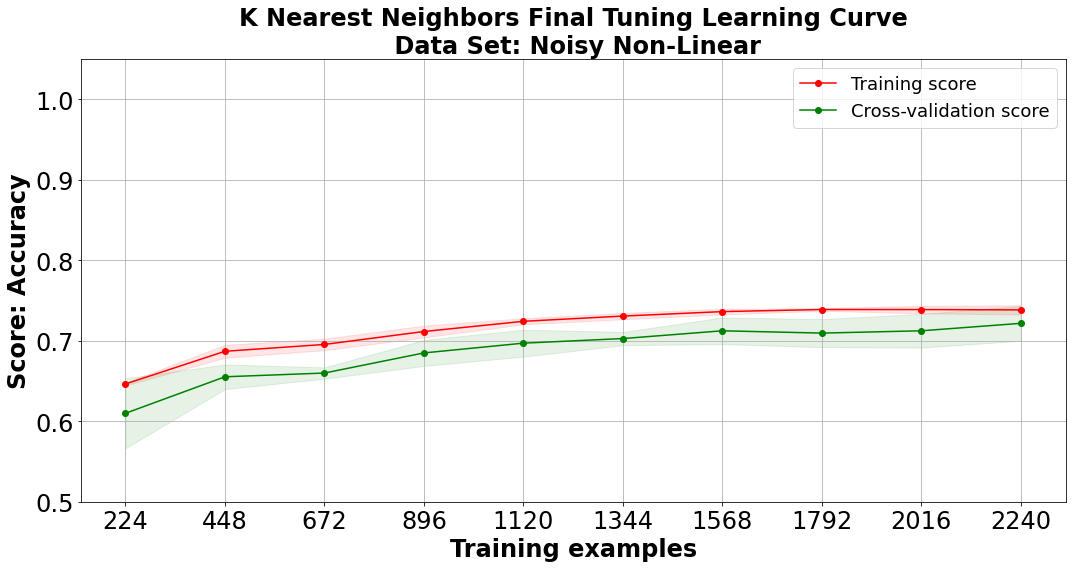

In [18]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)




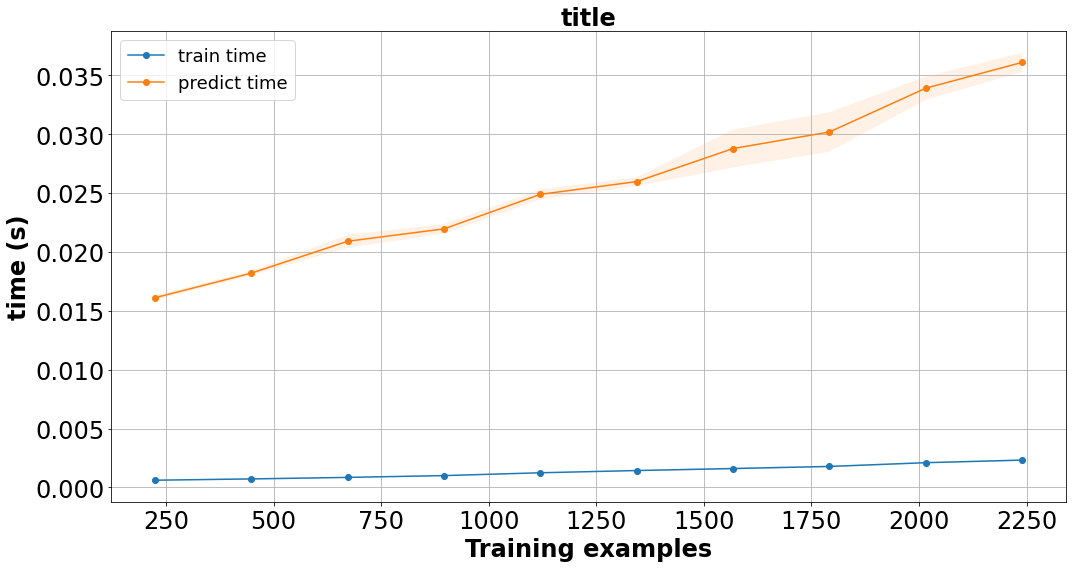

In [25]:
TrainingCurves.plot_scalability_curve(fit_times, score_times, train_sizes, "title")

In [28]:
clf = neighbors.KNeighborsClassifier(**params)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Final Fit Time: {}".format(np.mean(fit_times, axis=1)[-1]))
print("Final Predict Time: {}".format(np.mean(score_times, axis=1)[-1]))


0.7446428571428572
0.7128571428571429
Final Fit Time: 0.0023255348205566406
Final Predict Time: 0.036110210418701175


In [29]:
clf.score(X_test, y_test_non_noisy)

0.8214285714285714